In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
data = pd.read_csv('C:/AI_study/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_features = data.columns
df_features = data.columns.drop('Embarked')
df_features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin'],
      dtype='object')

In [4]:
df_data = pd.DataFrame(data[df_features])
df_target = pd.DataFrame(data['Embarked'], columns=['Embarked'])

In [5]:
df_target

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [7]:
# 결측치 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# 결측치가 있는 행을 제거한 새로운 DataFrame 생성
df_without_missing_values = data.dropna()

# 새로운 DataFrame 출력
print(df_without_missing_values)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [9]:
# 결측치가 있는 행을 제거하여 원본 DataFrame을 수정
data.dropna(inplace=True)

# 수정된 DataFrame 출력
print(data)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [10]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Text(0.5, 1.0, 'Survived')

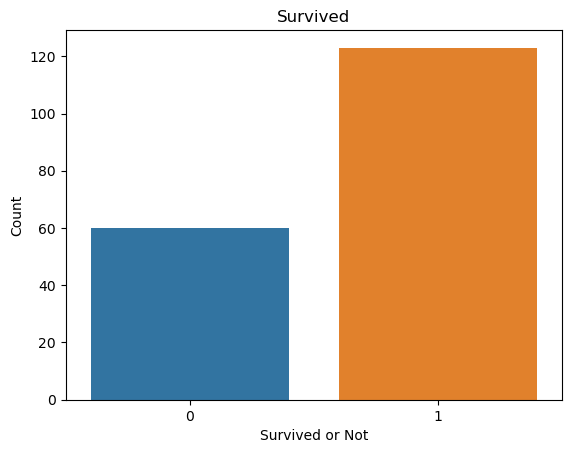

In [11]:
sns.countplot(data = data, x="Survived")
plt.xlabel("Survived or Not")
plt.ylabel("Count")
plt.title("Survived")

In [12]:
data['Survived'].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_16772\605798567.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], kde = True, hist = False, ax=ax1)
C:\Users\yc_hur\anaconda3\envs\test01\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_16772\605798567.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

<Axes: xlabel='Survived', ylabel='Density'>

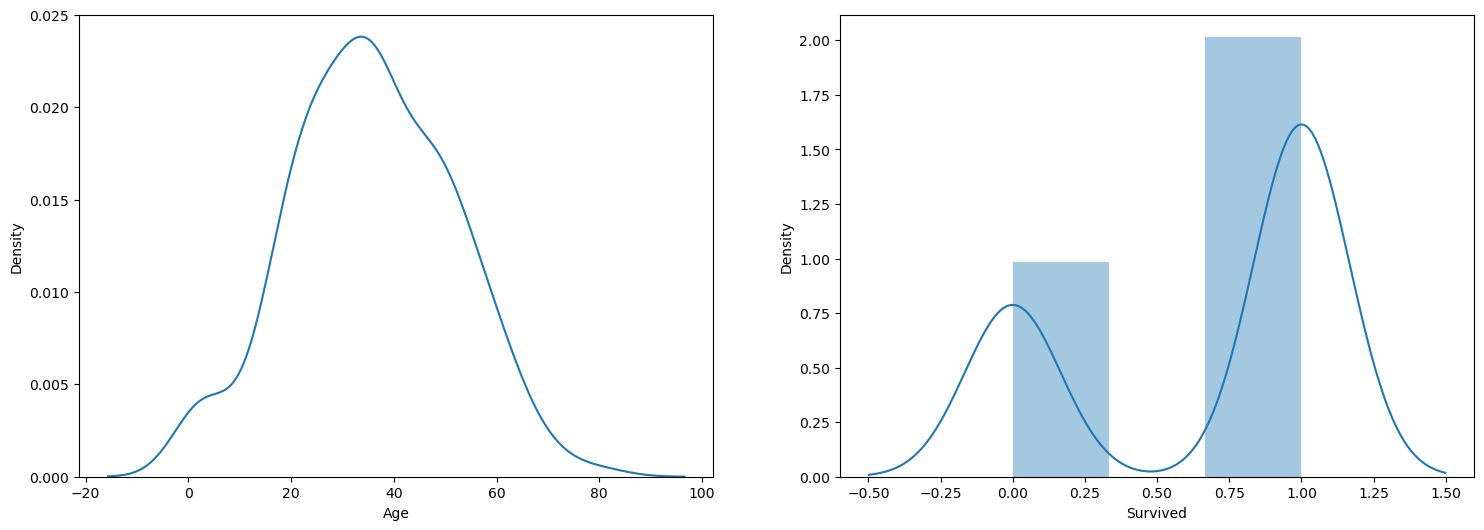

In [14]:
# age와 survived 분포
figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(data['Age'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(data['Survived'], ax=ax2)

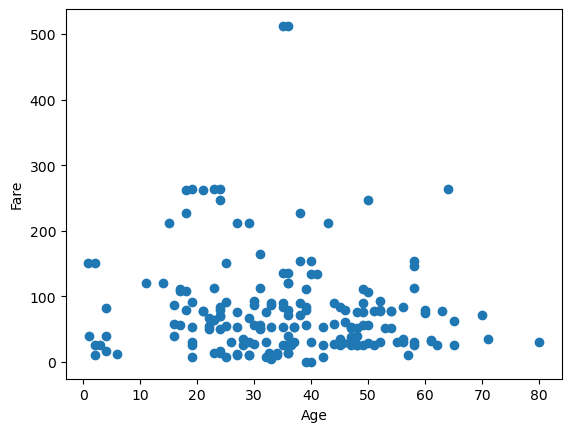

In [15]:
# age와 fare 관계
import matplotlib.pyplot as plt
import numpy as np


plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

In [16]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
data['Pclass'].value_counts()

Pclass
1    158
2     15
3     10
Name: count, dtype: int64

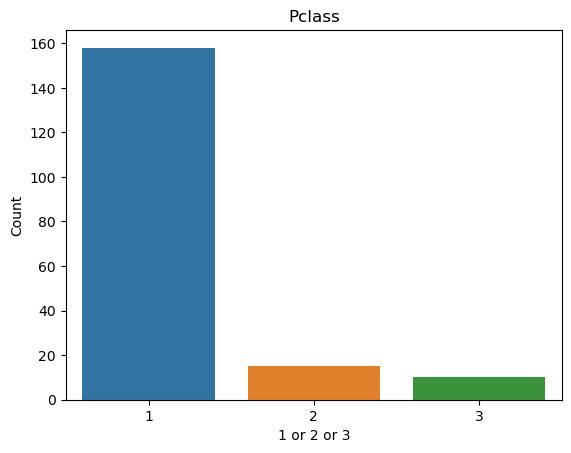

In [18]:
sns.countplot(data = data, x="Pclass")
plt.xlabel("1 or 2 or 3")
plt.ylabel("Count")
plt.title("Pclass")
plt.show()

In [19]:
Pclass_counts = data['Pclass'].value_counts()

print("Pclass Counts:")
print(Pclass_counts)

Pclass Counts:
Pclass
1    158
2     15
3     10
Name: count, dtype: int64


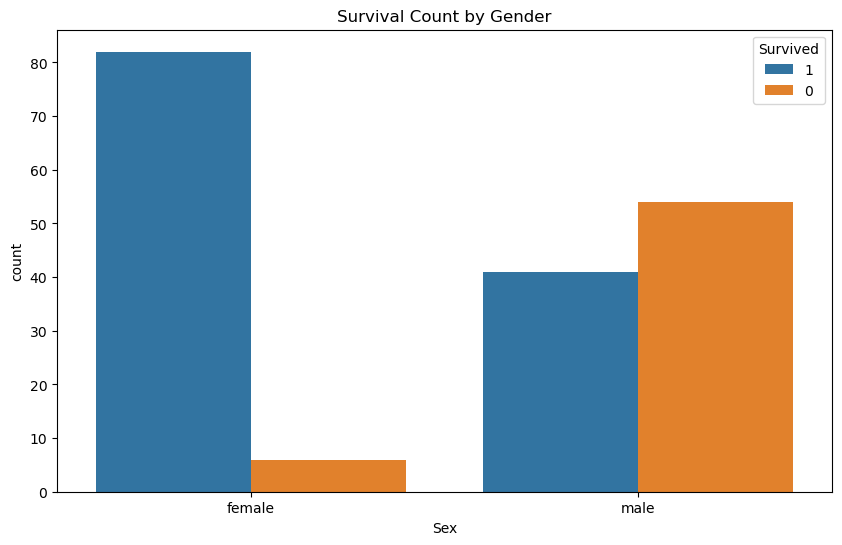

In [20]:
from scipy.stats import chi2_contingency

# 필요한 컬럼만 선택
subset_data = data[['Sex', 'Pclass', 'Survived']].copy()

# 'Survived'열을 문자열로 변경
subset_data['Survived'] = subset_data['Survived'].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=subset_data)
plt.title('Survival Count by Gender')
plt.show()

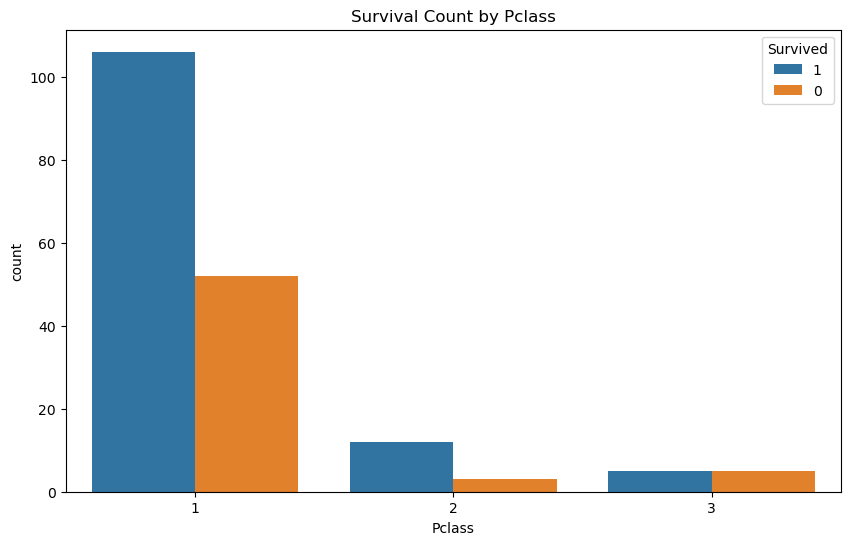

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=subset_data)
plt.title('Survival Count by Pclass')
plt.show()

In [22]:
# 'Survived' 열의 고유값 확인
print(data['Survived'].unique())

[1 0]


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Name'] = label.fit_transform(data['Name'])
data['Sex'] = label.fit_transform(data['Sex'])
data['Ticket'] = label.fit_transform(data['Ticket'])
data['Cabin'] = label.fit_transform(data['Cabin'])
data['Embarked'] = label.fit_transform(data['Embarked'])

In [25]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,49,0,38.0,1,0,109,71.2833,72,0
3,4,1,1,70,0,35.0,1,0,31,53.1000,48,2
6,7,0,1,112,1,54.0,0,0,55,51.8625,117,2
10,11,1,3,148,0,4.0,1,1,120,16.7000,131,2
11,12,1,1,27,0,58.0,0,0,26,26.5500,43,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,18,0,47.0,1,1,33,52.5542,91,2
872,873,0,1,35,1,33.0,0,0,89,5.0000,29,2
879,880,1,1,140,0,56.0,0,1,38,83.1583,61,0
887,888,1,1,75,0,19.0,0,0,10,30.0000,25,2


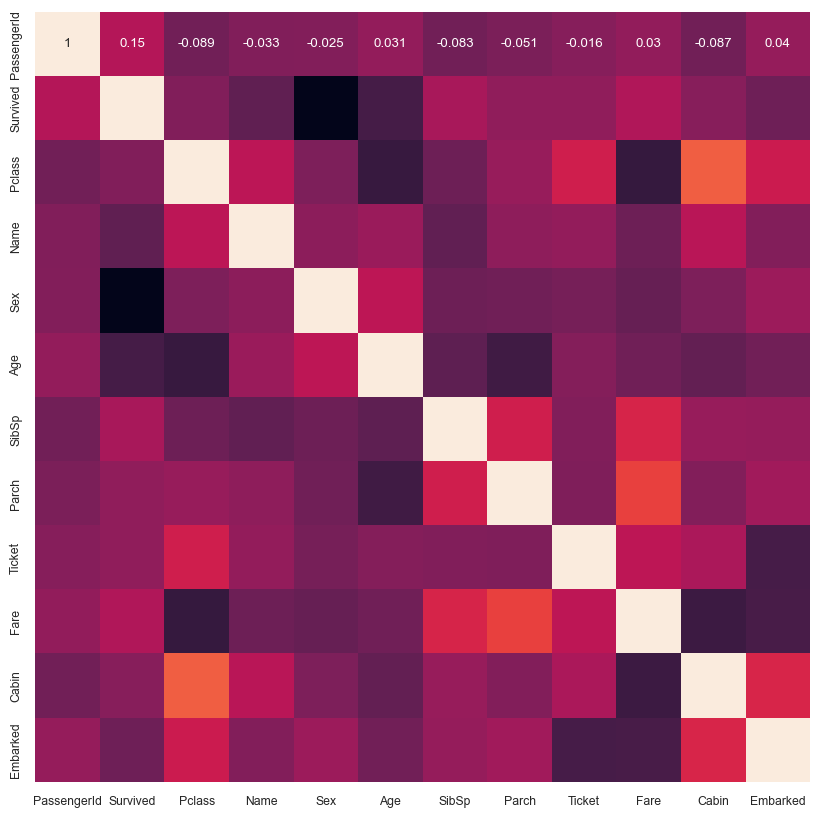

In [26]:
#상관 관계 행렬
df_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [27]:
X=data.drop('Survived',axis=1)
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,49,0,38.0,1,0,109,71.2833,72,0
3,4,1,70,0,35.0,1,0,31,53.1000,48,2
6,7,1,112,1,54.0,0,0,55,51.8625,117,2
10,11,3,148,0,4.0,1,1,120,16.7000,131,2
11,12,1,27,0,58.0,0,0,26,26.5500,43,2
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,18,0,47.0,1,1,33,52.5542,91,2
872,873,1,35,1,33.0,0,0,89,5.0000,29,2
879,880,1,140,0,56.0,0,1,38,83.1583,61,0
887,888,1,75,0,19.0,0,0,10,30.0000,25,2


In [28]:
y=data['Survived']
y.value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(pred_svm)
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
0.8043478260869565
[[ 0  9]
 [ 0 37]]


In [32]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print(pred_lr)
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
[1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 0 1]
0.782608695652174
[[ 6  3]
 [ 7 30]]


C:\Users\yc_hur\anaconda3\envs\test01\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# 로지스틱 회귀 모델 기울기와 절편

print(clf_lr.coef_, clf_lr.intercept_)

[[ 3.40512401e-01 -2.28713603e-01 -2.65293101e-01 -1.18498891e+00
  -6.38698981e-01  1.25352200e-01 -3.05523063e-01 -1.40760920e-01
   1.52174899e-01  2.50921950e-04 -1.98828752e-01]] [0.82517666]


In [33]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print(pred_dt)
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
[0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1]
0.782608695652174
[[ 4  5]
 [ 5 32]]


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
[1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1]
0.8695652173913043
[[ 6  3]
 [ 3 34]]


In [35]:
from sklearn.neighbors import KNeighborsClassifier

# KNN 분류 모델 생성
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
pred_knn = clf_knn.predict(X_test)

# 훈련 데이터에 대한 모델의 성능 출력 (R-squared)
print ("\n--- KNeighbors Classifier ---")
print(pred_knn)
print(accuracy_score(y_test,pred_knn))
print (confusion_matrix(y_test, pred_knn))


--- KNeighbors Classifier ---
[1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0
 1 1 1 1 1 0 1 1 1]
0.6739130434782609
[[ 3  6]
 [ 9 28]]


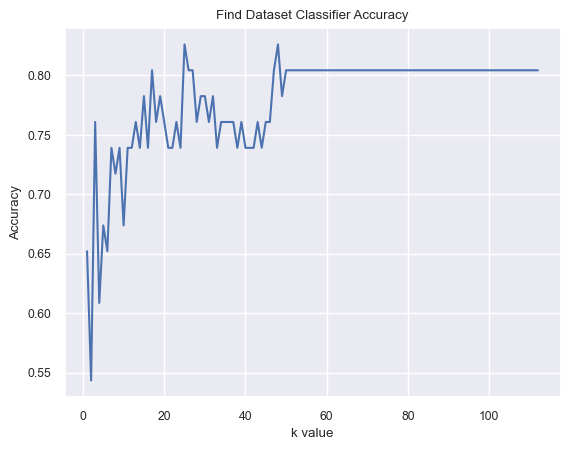

In [36]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))

plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Dataset Classifier Accuracy")
plt.show()

In [38]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [42]:
# 우선은 SVM으로만 평가

from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(pred_svm)
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
[1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 1]
0.8043478260869565
[[ 6  3]
 [ 6 31]]


In [45]:
# 표준화 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(X_train)
train_scaled = mm.transform(X_train)
test_scaled = mm.transform(X_test)

In [46]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(pred_svm)
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
[1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 0 1]
0.7608695652173914
[[ 6  3]
 [ 8 29]]


In [47]:
# 표준화 RobustScaler
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
rs.fit(X_train)
train_scaled = rs.transform(X_train)
test_scaled = rs.transform(X_test)

In [48]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(pred_svm)
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
[1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1]
0.8043478260869565
[[ 5  4]
 [ 5 32]]


In [49]:
# 표준화 MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

ma = MaxAbsScaler()
ma.fit(X_train)
train_scaled = ma.transform(X_train)
test_scaled = ma.transform(X_test)

In [50]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(pred_svm)
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
[1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 0 1]
0.7608695652173914
[[ 6  3]
 [ 8 29]]
